In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from kuramoto import *

In [24]:
def find_lengths(phases): 
    phases = np.floor(phases / (2*np.pi/3)).astype('int')
    lengths = [[], [], []]
    w = 1
    q = phases[0]
    for p in phases[1:]: 
        if p == q: # if same phase as previous one 
            w += 1 
        else: 
            lengths[q].append(w)
            w = 1 
        q = p 
    return lengths 

In [33]:
# Set up model parameters 
epsilon = 1
gamma = 0
sigma = 0.173
mean_omega = 0.5

# Set up simulation parameters 
L = 256 # size of the system 
T = 1e3 # total time of the simulation 
dt = 1e-2 # time step 
n_batches = T # number of time points recorded in the end 

# Initialise the model and run the simulation 

lengths_samples = [] 
variables = [0.01, 0.1, 0.2, 1, 2]
for gamma in variables:
    model = Kuramoto(epsilon, gamma, sigma, mean_omega)
    model.initialise(L, T, dt, n_batches, seed=0)
    model.evolve(verbose=False) 
    phases = model.res[-2] % 2*np.pi
    lengths_samples.append(find_lengths(phases))

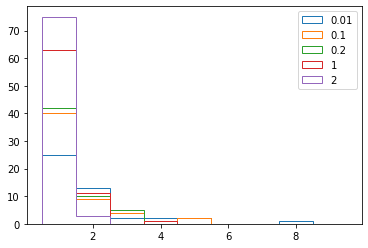

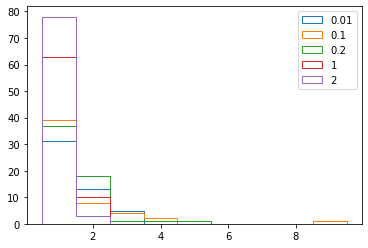

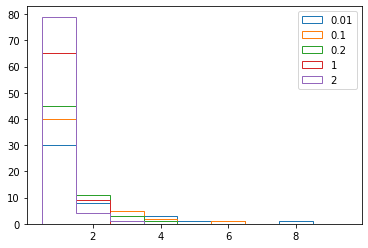

In [34]:
bins = np.arange(10)+0.5
for i in range(3): 
    for (j, lengths) in enumerate(lengths_samples): 
        plt.hist(lengths[i], bins=bins, histtype='step', label='{}'.format(variables[j]))
    plt.legend()
    plt.show() 